In [1]:
require(cowplot)
require(data.table)
require(ggplot2)
require(ggforce)
require(outliers)
require(pbapply)
require(tiff)

Loading required package: cowplot


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Loading required package: data.table

Loading required package: ggplot2

Loading required package: ggforce

Loading required package: outliers

Loading required package: pbapply

Loading required package: tiff



# 60x

In [2]:
nfdata = fread("../../data/60x_mask/nuclear_features.csv")
head(nfdata, 1)

sid,nid,size,dilated_size
<int>,<int>,<int>,<int>
1,1,2988,7363


In [3]:
p1 = ggplot(nfdata, aes(x=factor(1), y=size)) + geom_violin(trim=T) + geom_boxplot(width=.1) +
    theme_bw() + labs(x="", y="Nuclear size in voxel", title="Watersheded labels")

In [4]:
p2 = ggplot(nfdata, aes(x=factor(1), y=dilated_size)) + geom_violin(trim=T) + geom_boxplot(width=.1) +
    theme_bw() + labs(x="", y="Nuclear size in voxel", title="Watersheded labels after dilation (no overlap)")

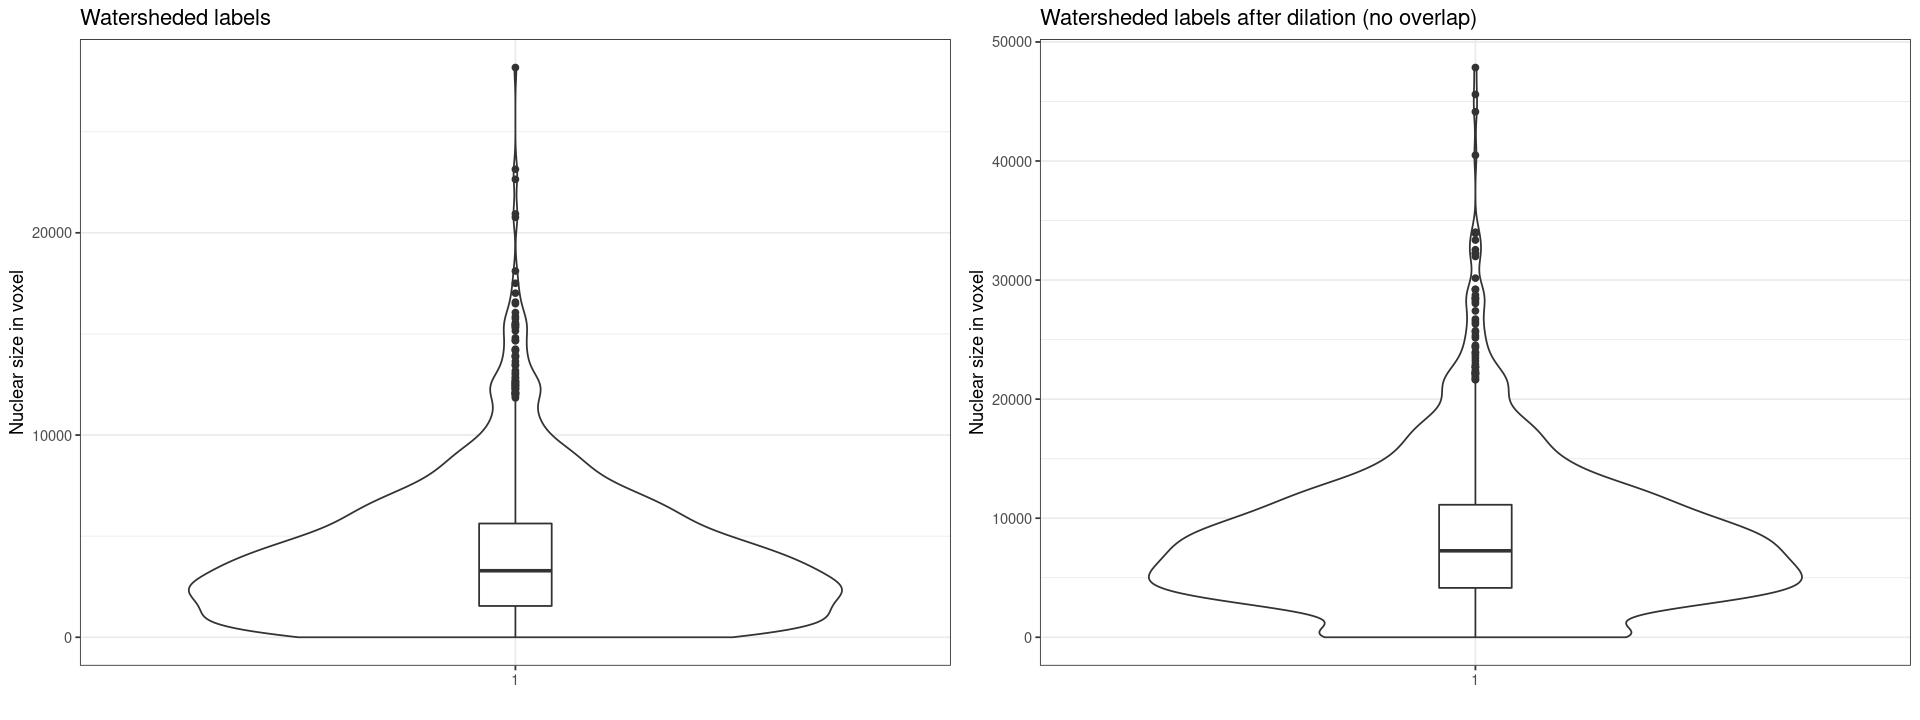

In [5]:
options(repr.plot.width=16, repr.plot.height=6)
plot_grid(p1, p2, nrow=1)

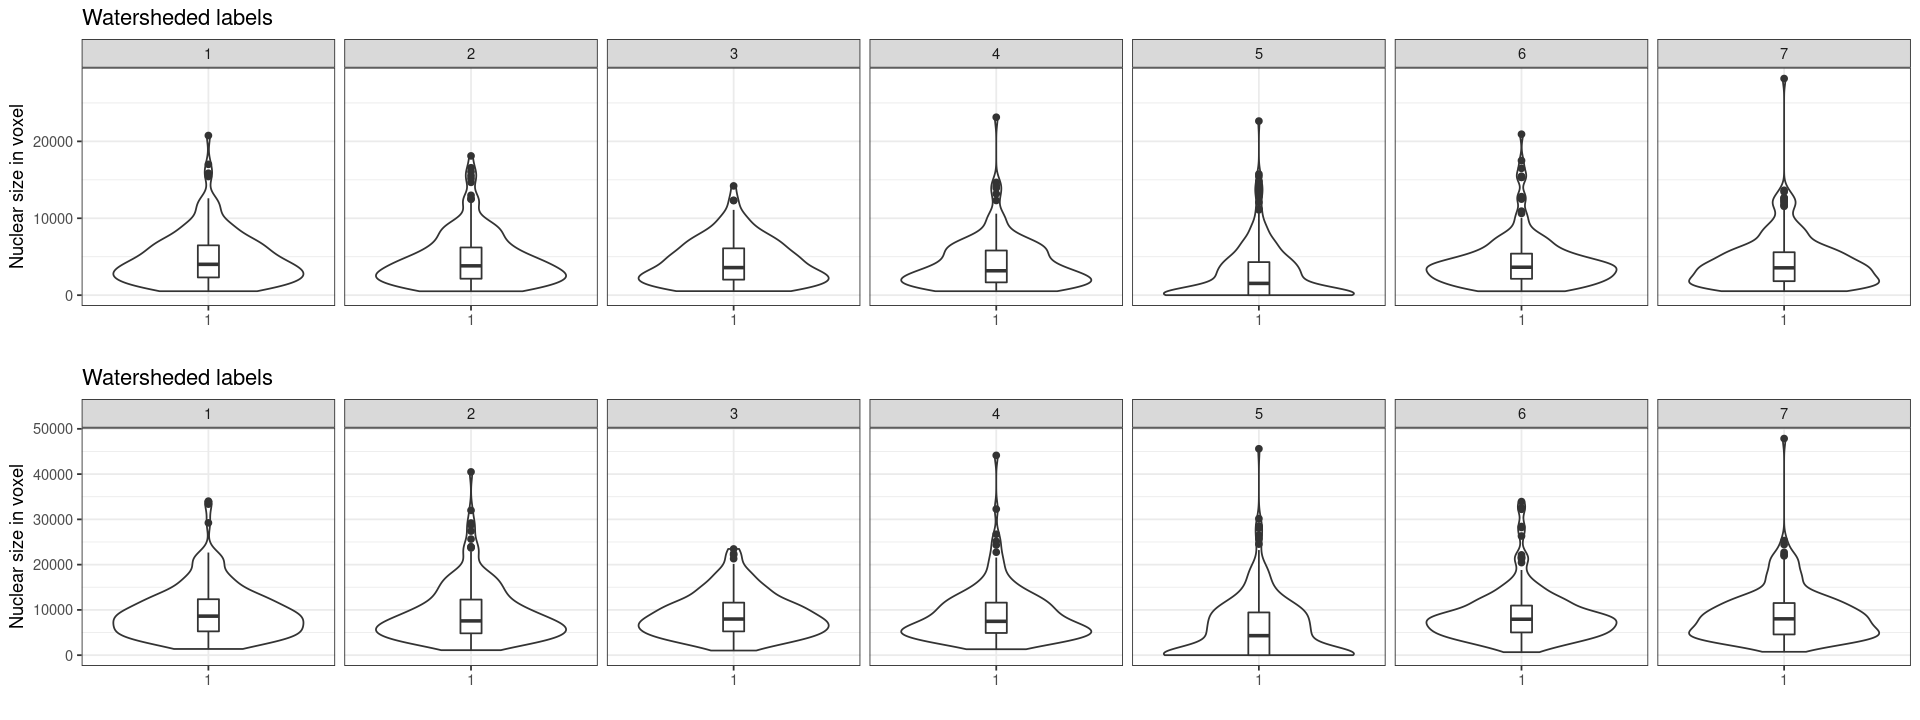

In [6]:
p1 = ggplot(nfdata, aes(x=factor(1), y=size)) + geom_violin(trim=T) + geom_boxplot(width=.1) +
    theme_bw() + labs(x="", y="Nuclear size in voxel", title="Watersheded labels") + facet_wrap(~sid, nrow=1)
p2 = ggplot(nfdata, aes(x=factor(1), y=dilated_size)) + geom_violin(trim=T) + geom_boxplot(width=.1) +
    theme_bw() + labs(x="", y="Nuclear size in voxel", title="Watersheded labels") + facet_wrap(~sid, nrow=1)
options(repr.plot.width=16, repr.plot.height=6)
plot_grid(p1, p2, nrow=2)

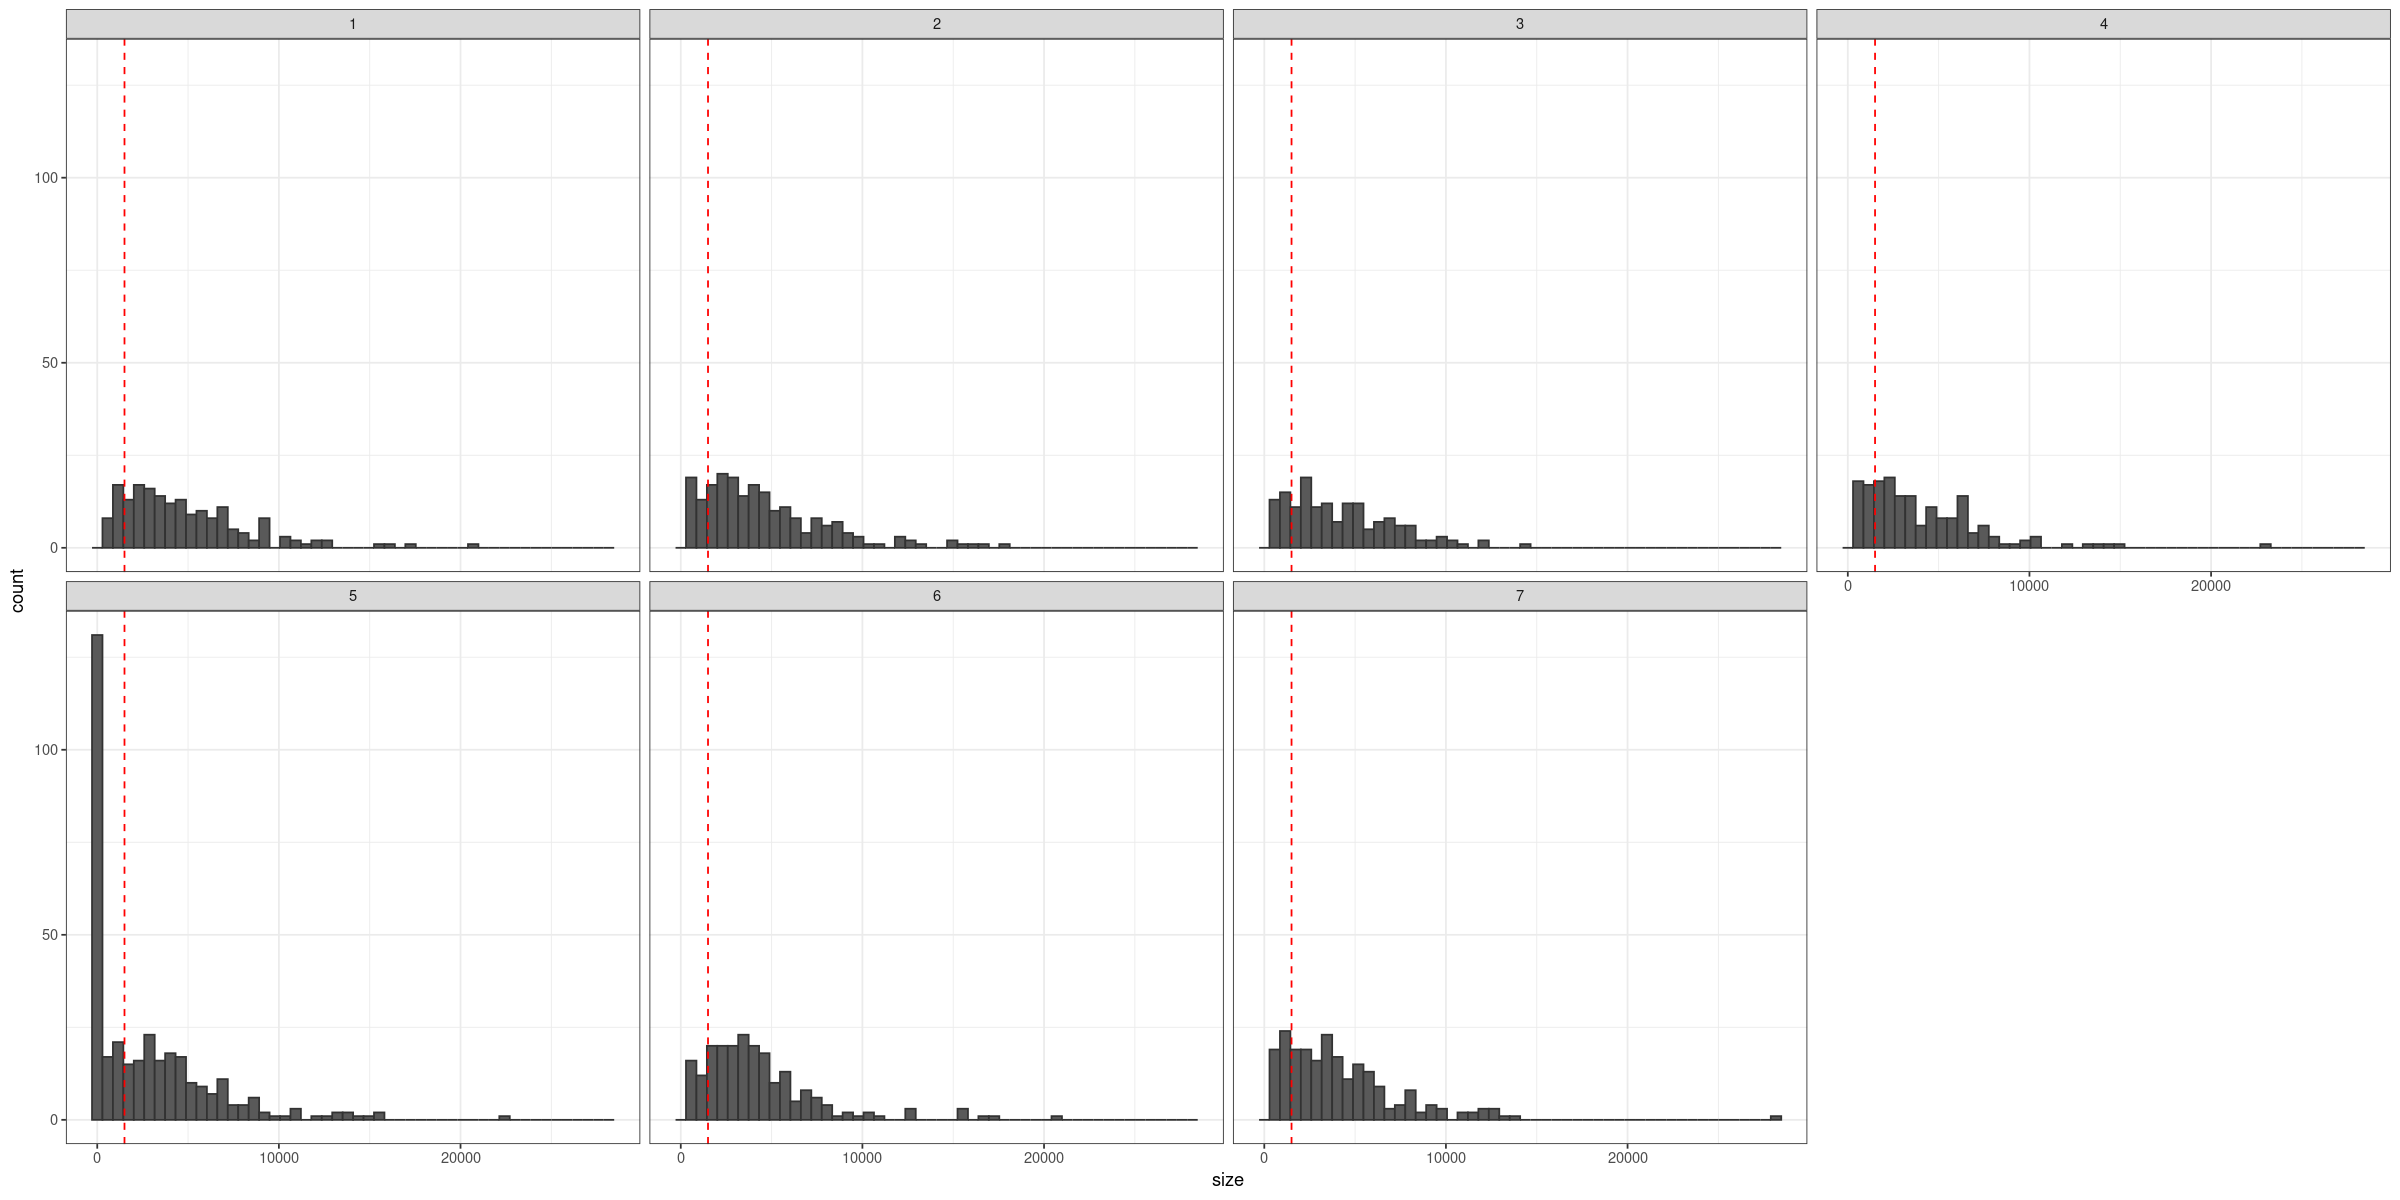

In [7]:
options(repr.plot.width=20, repr.plot.height=10)
ggplot(nfdata, aes(x=size)) + geom_histogram(color="#323232", bins=50) +
    facet_wrap(~sid, nrow=2) + theme_bw() + geom_vline(xintercept=1.5e3, color="red", linetype="dashed")

In [8]:
#nfdata[size>5e3, nid, by=sid]

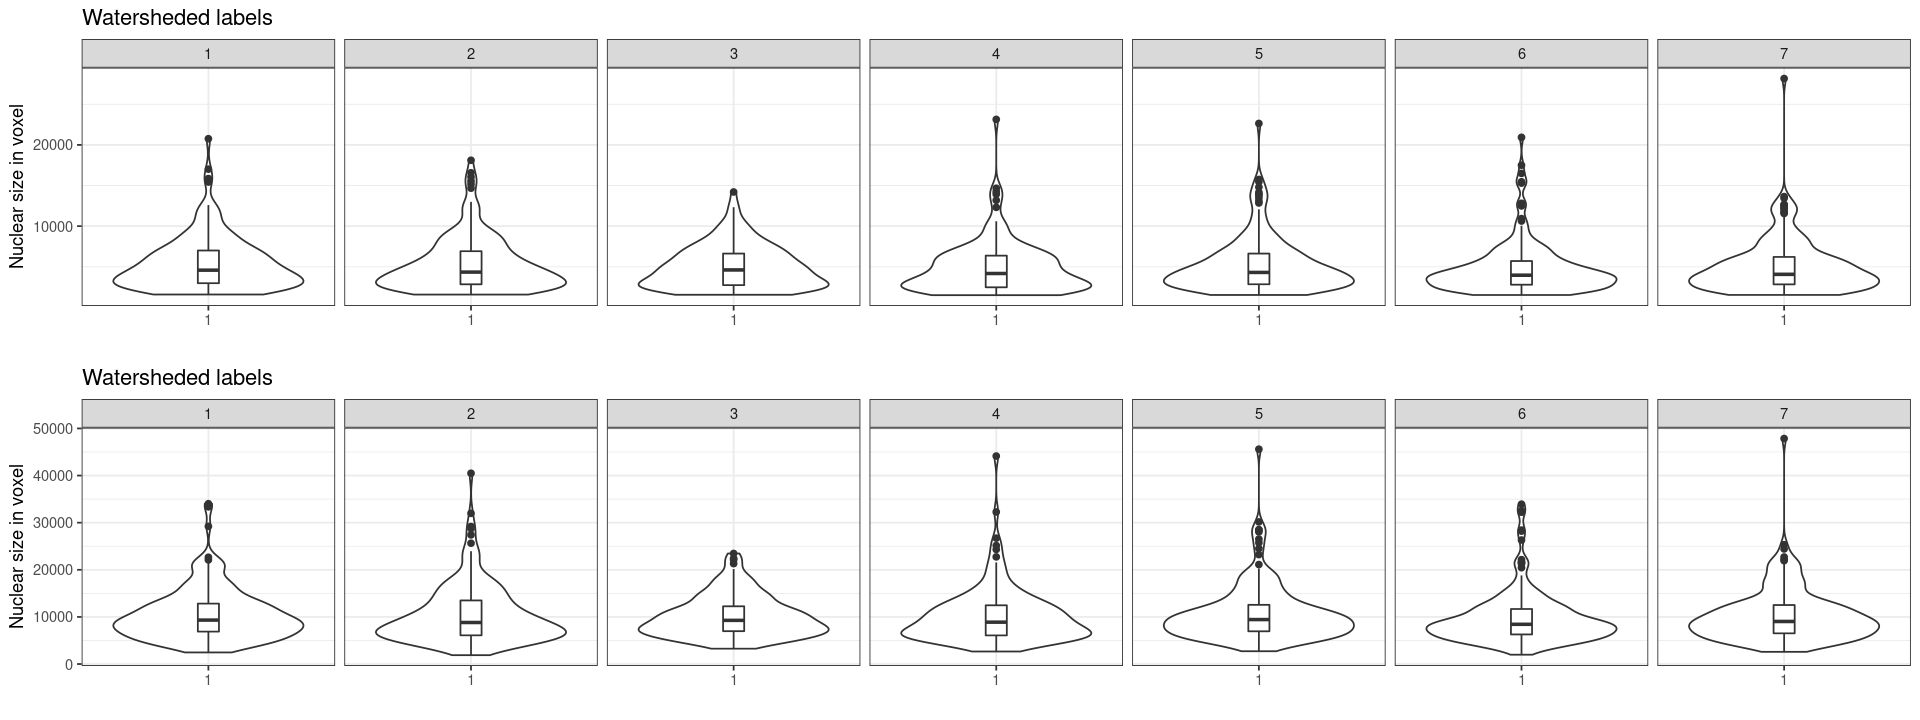

In [9]:
nfdata2 = copy(nfdata[size > 1.5e3])

p1 = ggplot(nfdata2, aes(x=factor(1), y=size)) + geom_violin(trim=T) + geom_boxplot(width=.1) +
    theme_bw() + labs(x="", y="Nuclear size in voxel", title="Watersheded labels") + facet_wrap(~sid, nrow=1)
p2 = ggplot(nfdata2, aes(x=factor(1), y=dilated_size)) + geom_violin(trim=T) + geom_boxplot(width=.1) +
    theme_bw() + labs(x="", y="Nuclear size in voxel", title="Watersheded labels") + facet_wrap(~sid, nrow=1)
options(repr.plot.width=16, repr.plot.height=6)
plot_grid(p1, p2, nrow=2)

In [10]:
#options(repr.plot.width=16, repr.plot.height=16)
#heatmap(tiff::readTIFF("../../data/60x_mask/labels/a647_001.labels.tiff"), Rowv=NA, Colv=NA, labRow=NA, labCol=NA)

In [11]:
fwrite(nfdata2, "../../data/selected_nuclei.tsv", sep="\t")